In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import shutil
%matplotlib inline

### 建立簡單的注意力機制
- 改變過往向量單純的平均加總，是可以動態擁有權重，也比較符合直覺。

In [8]:
class Attention(tf.keras.layers.Layer):
    def __init__(self, k):
        super(Attention, self).__init__()
        self.k = k
        self.a = keras.layers.Dense(units=self.k, activation='softmax')
        self.mul = keras.layers.Multiply()
    
    def call(self, inputs):
        attention = self.a(inputs)
        return self.mul([inputs, attention])


假設有一個神經網路，其有10個輸入，需要得到動態權重。

In [9]:
input_dim = 10


inputs = keras.Input(shape=(input_dim,))
x = Attention(k=input_dim)(inputs)
outputs = keras.layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
attention_3 (Attention)      (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


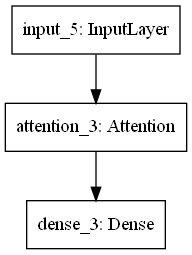

In [10]:
tf.keras.utils.plot_model(model, to_file='attention-network.png')